In [1]:
import sys
sys.path.append("..")

from umap_algo.umap_class import umap_mapping

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import umap
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("../data/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


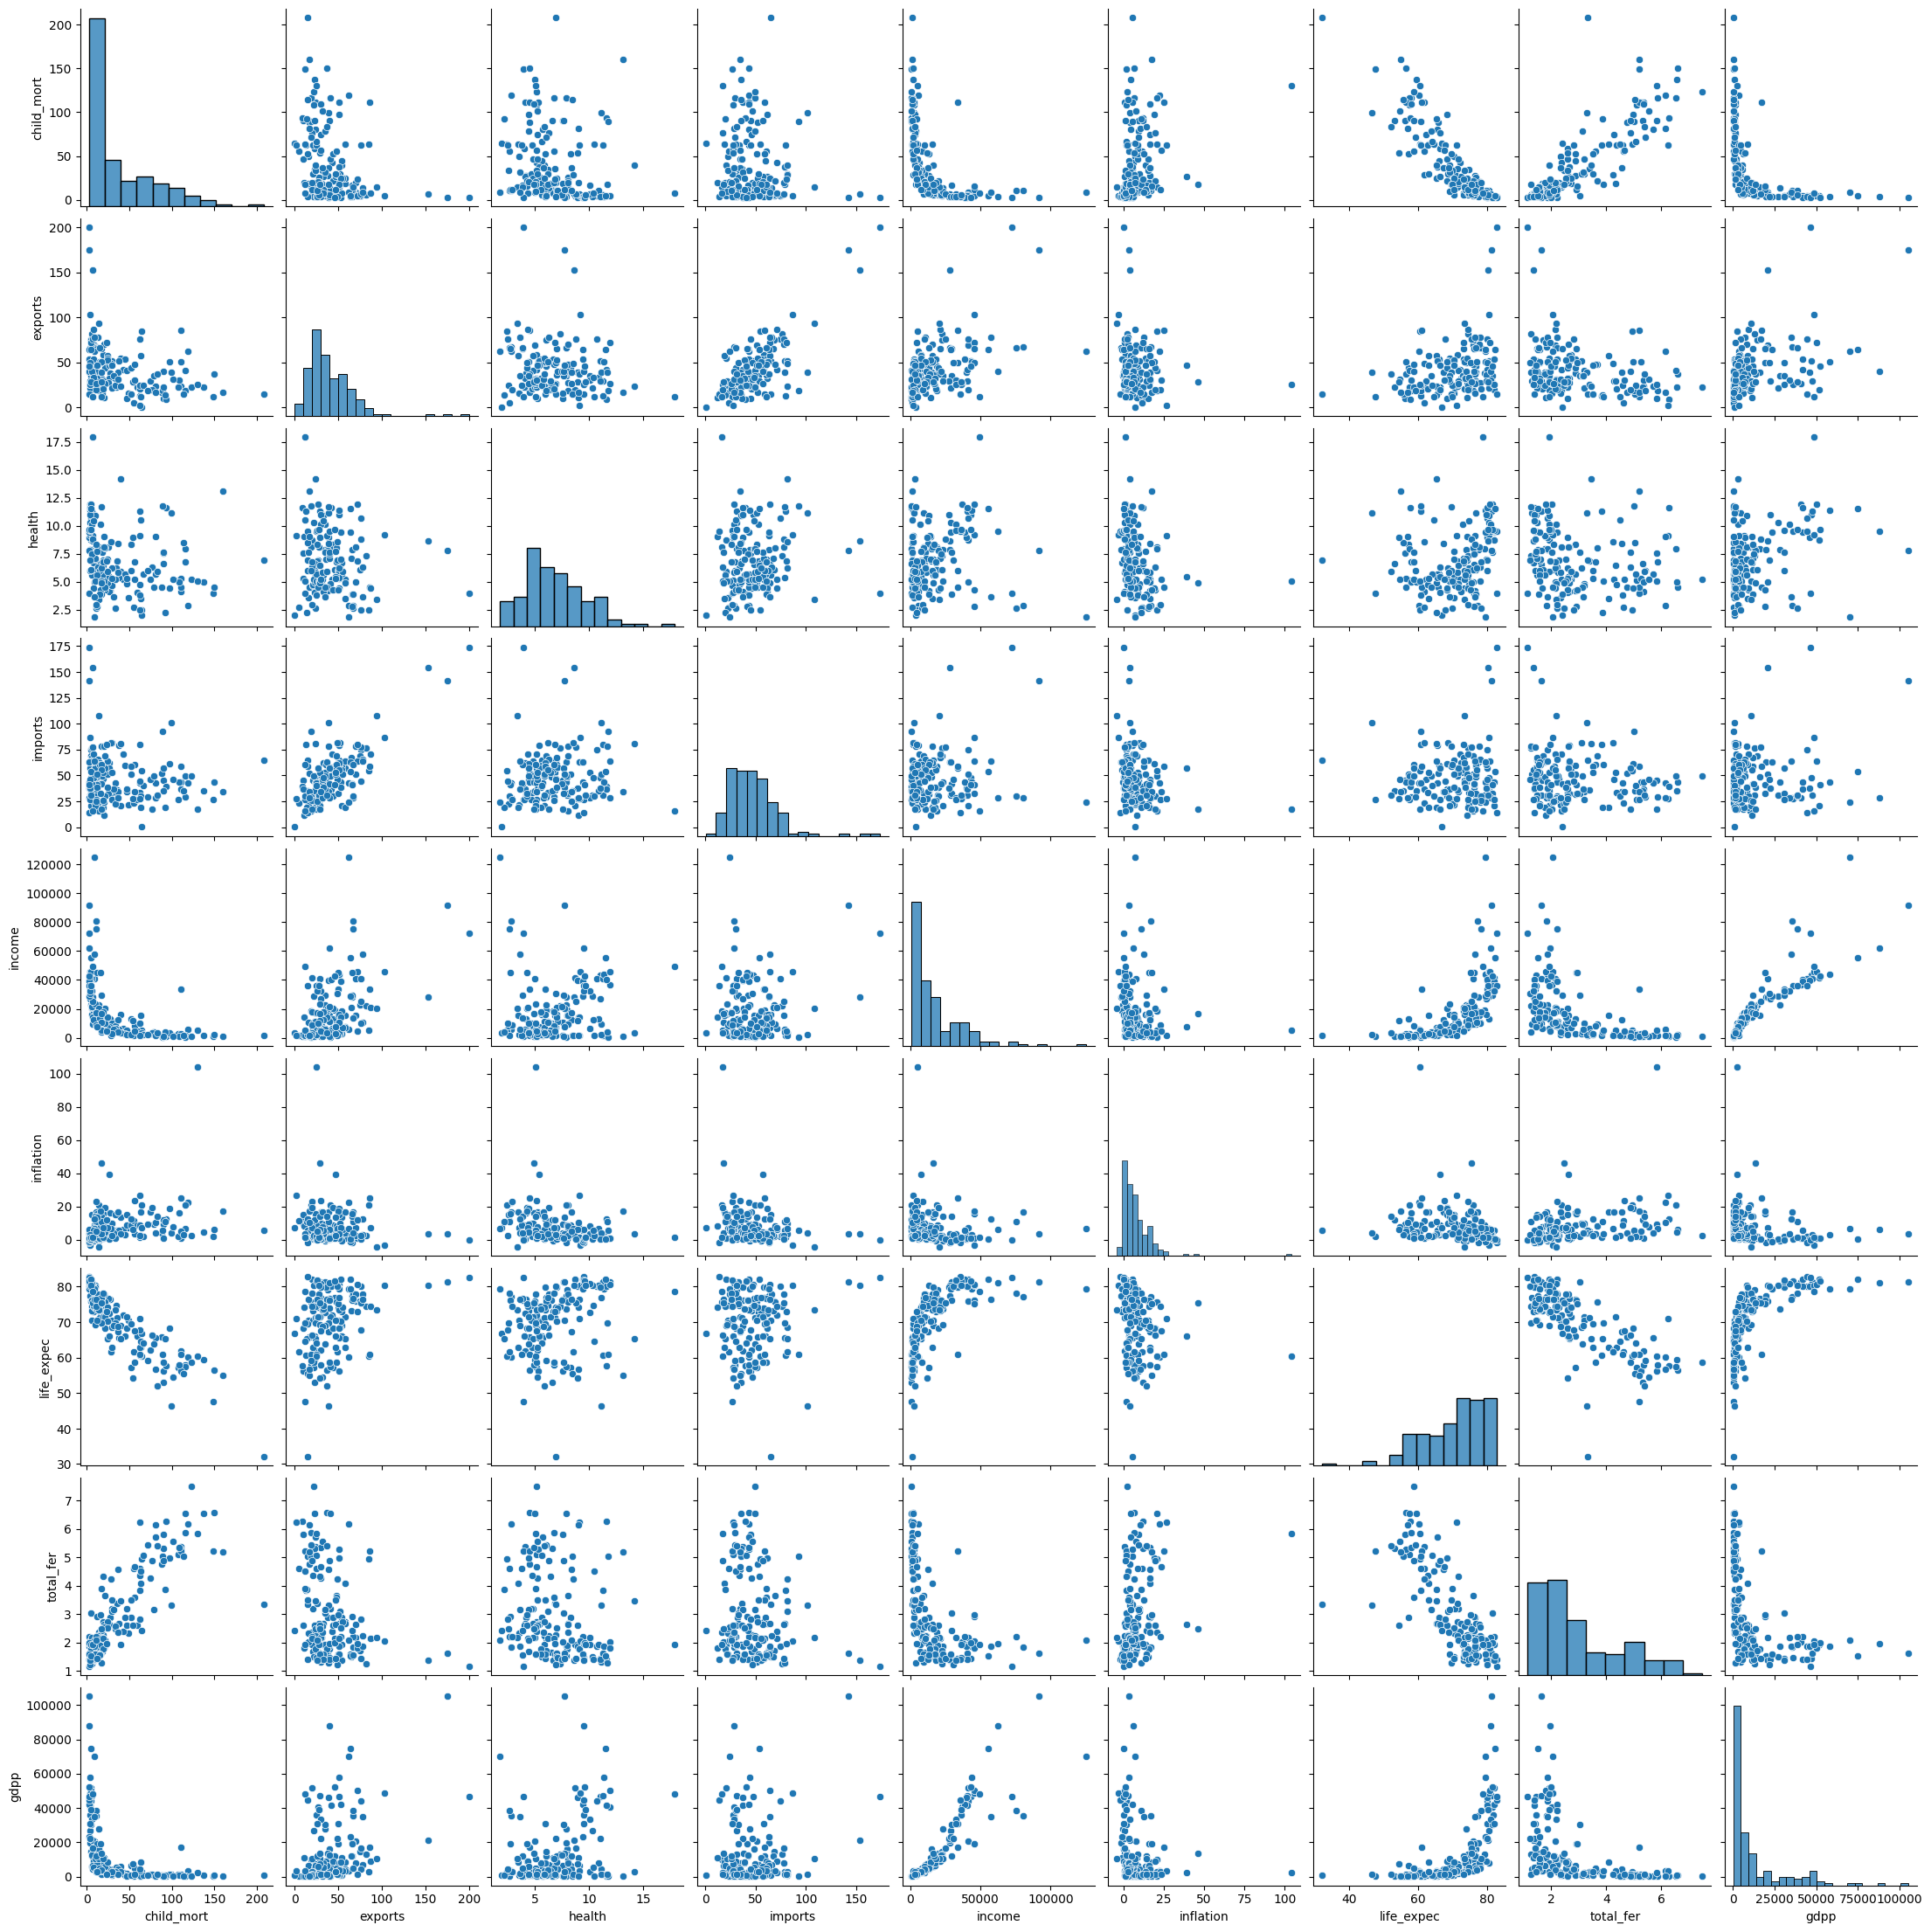

In [5]:
sns.pairplot(df.drop(columns=["country"]))

In [6]:
X = df.drop(columns=["country"]).values
X_scaled = StandardScaler().fit_transform(X)

Text(0.5, 1.0, 'PCA Projection')

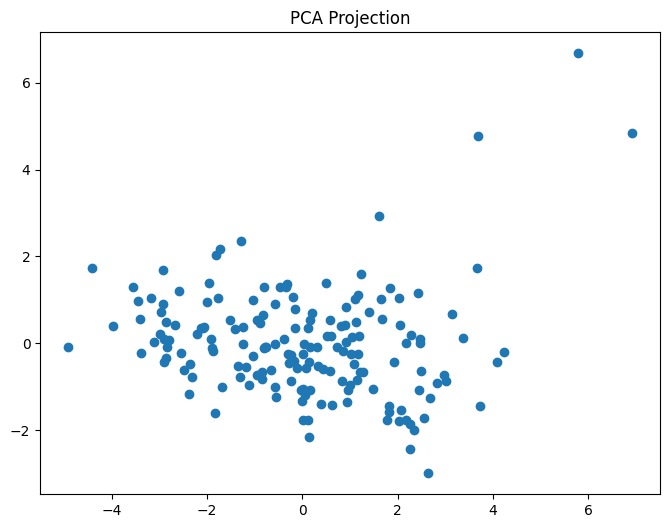

In [7]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("PCA Projection")

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Text(0.5, 1.0, 'UMAP Projection')

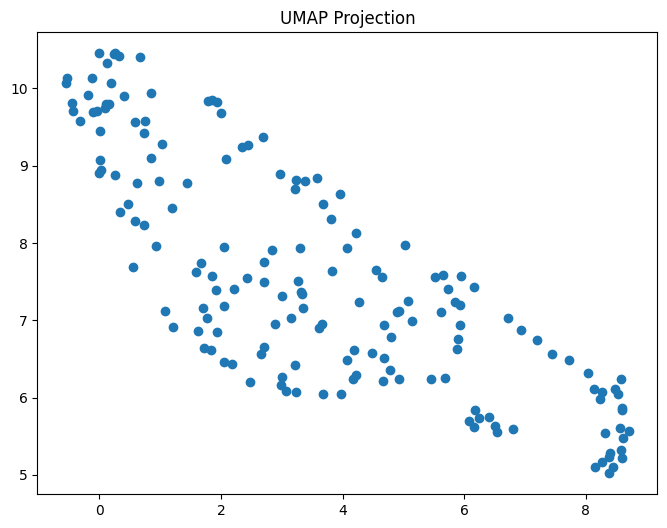

In [8]:
# UMAP library mapping
umap_lib = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42, n_epochs=500)
X_umap = umap_lib.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1])
plt.title("UMAP Projection")

In [ ]:
# UMAP custom mapping
umap_model = umap_mapping(n_neighbors=15, min_dist=0.1, n_components=2, KNN_metric='euclidean', KNN_method='approx', random_state=42)
X_umap_custom = umap_model.fit_transform(X_scaled, n_epochs=500)
plt.figure(figsize=(8,6))
plt.scatter(X_umap_custom[:,0], X_umap_custom[:,1])
plt.title("Custom UMAP Projection")